In [12]:
import numpy as np
np.set_printoptions(threshold=10000,suppress=True)
import pandas as pd
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [13]:
data = pd.read_csv('./data/villes.csv', sep=';')
X = data.iloc[:, 1:13].values
labels = data.iloc[:, 0].values

Question 2 : a)

In [14]:
pca = PCA(n_components=12)
pca.fit(X)
print(pca.explained_variance_ratio_)

explained_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
component = np.argmax(explained_variance_ratio >= 0.9) + 1
print(f"\n Nombre d'axes nécessaires pour au moins {0.9 * 100}% de l'information: {component}")

[0.87042713 0.12064247 0.00378357 0.00254544 0.00096575 0.00052796
 0.00038435 0.00032959 0.00017116 0.00012295 0.00007647 0.00002315]

 Nombre d'axes nécessaires pour au moins 90.0% de l'information: 2


Pour conserver un minimum de 90% de l'information représentée dans le nuage initial, nous n'avons qu'à conserver les deux premiers axes. (0.87 + 0.12 = 0.99 > 0.90)

Question 2 : b)

Les deux axes principaux sont les directions dans lesquelles la variance des données est maximale. Les données climatiques des villes étant sujettes à des variations de températures saisonnières.

Le premier axe pourrait correspondre à la température moyenne des villes (les villes du sud auront des valeurs plus grandes que les villes du nord) car ça semble être la principale source de variation dans un ensemble de données climatiques. Le deuxième axe pourrait correspondre à la stabilité de la température selon les saisons.

Question 2 : c)

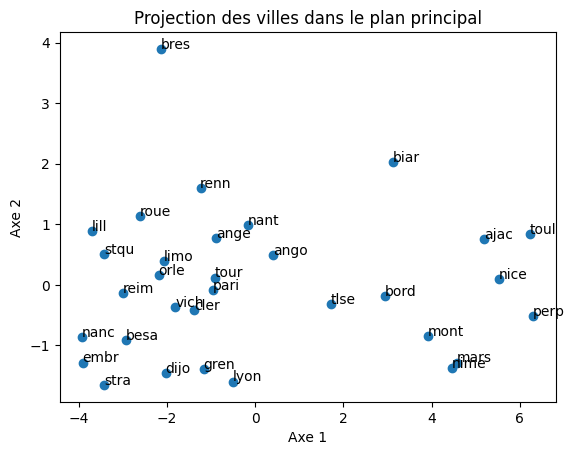

In [15]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA()
X_pca = pca.fit_transform(X_scaled)

plt.scatter(X_pca[:, 0], X_pca[:, 1])
for l, x, y in zip(labels, X_pca[:, 0], X_pca[:, 1]):
    plt.annotate(l, xy=(x, y), xytext=(-0.2, 0.2), textcoords='offset points')
plt.xlabel("Axe 1")
plt.ylabel("Axe 2")
plt.title("Projection des villes dans le plan principal")
plt.show()

Question 2 : d)

Grâce aux données récupérées dans le nuage de points, nous pouvons remarquer que notre hypothèse effectuée dans la question b) est vérifiée, le premier axe correspond bien à la température moyenne avec les villes plus chaudes à droite et les froides à gauche et le deuxième correspond à la stabilité de la température selon les saisons.

Les villes plutot chaudes du sud de la France (Nice, Marseille, Montpellier, Toulouse, Ajaccio, Nimes) sont regroupées dans la partie du droite du graphique, avec des coordonnées positives sur l’axe 1. Les villes du nord et de l’est du pays (Strasbourg, Reims, Nancy) sont positionnées dans plutôt à gauche reflétant leurs températures annuelles plus basses. Les villes frontalières à l’Atlantique ou à la Manche (Brest, Biarritz, Nantes, Lille) sont situées plus haut dans le graphique (selon l'Axe 2) car elles ont un climat plus stable et tempéré.

On remarque, si on effectue une rotation de 90 sur la droite puis une symetrie horizontale de ce graphique, que cette visualisation rappelle la géographie de la france.

Question 2 : e)

In [16]:
def analyse_composante_principale(path_file : str, start_column_data : int, end_column_data : int):
    data = pd.read_csv('./' + path_file, sep=';')
    X = data.iloc[:, start_column_data:end_column_data].values
    labels = data.iloc[:, 0].values

    pca = PCA(n_components = end_column_data - start_column_data)
    pca.fit(X)
    print(pca.explained_variance_ratio_)

    explained_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
    component = np.argmax(explained_variance_ratio >= 0.9) + 1
    print(f"\n Nombre d'axes nécessaires pour au moins {0.9 * 100}% de l'information: {component}")

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    pca = PCA()
    X_pca = pca.fit_transform(X_scaled)

    plt.scatter(X_pca[:, 0], X_pca[:, 1])
    for l, x, y in zip(labels, X_pca[:, 0], X_pca[:, 1]):
        plt.annotate(l, xy=(x, y), xytext=(-0.2, 0.2), textcoords='offset points')
    plt.xlabel("Axe 1")
    plt.ylabel("Axe 2")
    plt.title("Projection des villes dans le plan principal")
    plt.show()

[0.87042713 0.12064247 0.00378357 0.00254544 0.00096575 0.00052796
 0.00038435 0.00032959 0.00017116 0.00012295 0.00007647 0.00002315]

 Nombre d'axes nécessaires pour au moins 90.0% de l'information: 2


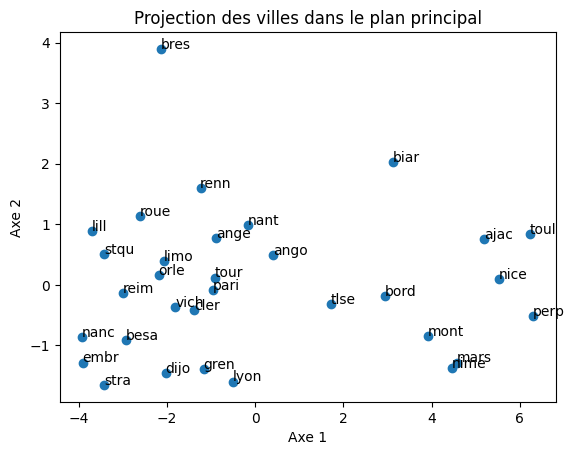

In [17]:
analyse_composante_principale('data/villes.csv', 1, 13)

Question 3

[0.8735949  0.08274478 0.03147604 0.00820624 0.00392234 0.00004833
 0.00000737]

 Nombre d'axes nécessaires pour au moins 90.0% de l'information: 2


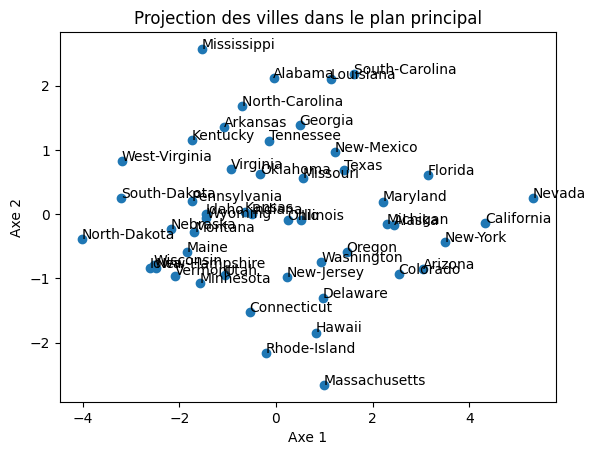

In [ ]:
analyse_composante_principale('data/crimes.csv', 1, 8)

Grâce aux données récupérer avec notre fonctions, nous pouvons interpreter le premier axe comme étant le nombre de crime tous crimes confondu.
Le deuxième axe correspondrait à la différence entre le nombre de crime le plus élevé et nombre le plus bas.

Question 4

[0.88257072 0.08414886 0.03084867 0.00243174]

 Nombre d'axes nécessaires pour au moins 90.0% de l'information: 2


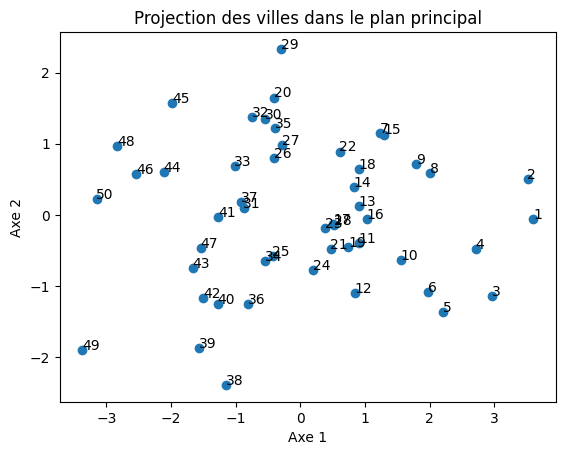

In [19]:
analyse_composante_principale('data/50_Startups.csv', 1, 5)